In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Analysis of variance (ANOVA)
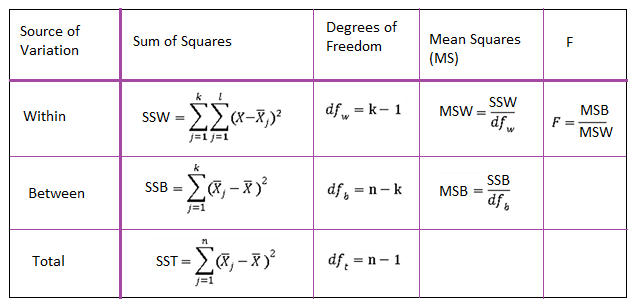

Reference: https://byjus.com/anova-formula/

- F = Anova Coefficient
- MSB = Mean sum of squares between the groups

- MSW = Mean sum of squares within the groups

- SE = Mean sum of squares due to error

- SST = total Sum of squares

- p = Total number of populations

- n = The total number of samples in a population

- SSW = Sum of squares within the groups

- SSB = Sum of squares between the groups

- SSE = Sum of squares due to error

- s = Standard deviation of the samples

- N = Total number of observations

# Conditions
- Equality of variance
  - scipy의 levene으로 test (p-value가 0.0001 이상이면 equal)

- Normality
  - Q-Q Plot에서 linear line을 따라야 한다.
  
- Independence

In [ ]:
p1 = pd.DataFrame([[49, 56, 51], [47, 54, 55], [46, 61, 57], [50, 57, 53]], columns = ['A', 'B', 'C'], index = [1,2,3,4])
p1.index.name = 'Area'
print(p1)
print('-'*20)

# 전체 평균
mean_overall = p1.to_numpy().flatten().mean()
# Mean = p1.values.flatten().mean()
print('Total mean: ',mean_overall)

# 그룹간 평균
mean_group = p1.mean().values

print('Group means: ',mean_group)
print('-'*20)

# 그룹간 편차
var_btw = mean_group - mean_overall
print(var_btw)
print('-'*20)

# 그룹내 편차
var_within = p1 - var_btw - mean_overall
print(var_within)

       A   B   C
Area            
1     49  56  51
2     47  54  55
3     46  61  57
4     50  57  53
--------------------
Total mean:  53.0
Group means:  [48. 57. 54.]
--------------------
[-5.  4.  1.]
--------------------
        A    B    C
Area               
1     1.0 -1.0 -3.0
2    -1.0 -3.0  1.0
3    -2.0  4.0  3.0
4     2.0  0.0 -1.0


# Sum of Squares

In [ ]:
SSB = (var_btw**2).sum()*4
print('SSB: ', SSB)

SSW = (var_within.values**2).sum()
print('SSW: ', SSW)


SSB:  168.0
SSW:  56.0


# Degree of Freedom

In [ ]:
df_b = len(p1.columns) - 1
df_w = len(p1.columns)*len(p1.index) - len(p1.columns)
print(df_b, df_w)

2 9


# Mean Squares

In [ ]:
MSB = SSB / df_b
MSW = SSW / df_w

print(MSB)
print(MSW)

84.0
6.222222222222222


# F: ANOVA Coefficient

In [ ]:
F = MSB / MSW
print(F)

13.5
